# **PROBLEM STATEMENT**

   QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

    Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

    You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.
    alt

    Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets


# **Downloading the Data**

In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7d1bac131360>)

In [3]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.**

In [4]:
#Check the data type of each columns
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
##Calculate the basic calulations of columns
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Exploratory Analysis and Visualisation**

* **Let's explore data visualisation by establishing relationship between 'charges' column with other columns**
* We will use **Matplotlib**, **Seaborn** and **Plotly** for data analysis and visualisation.

# Resources
* https://jovian.com/outlink?url=https%3A%2F%2Fjovian.ai%2Faakashns%2Fpython-matplotlib-data-visualization
* https://jovian.com/outlink?url=https%3A%2F%2Fjovian.ai%2Faakashns%2Finteractive-visualization-plotly
* https://jovian.com/outlink?url=https%3A%2F%2Fjovian.ai%2Faakashns%2Fdataviz-cheatsheet

In [6]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Let's set default features
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# **Age**

* Age is an integer data type whose minimum value is 18 and maximum value is 64. So the number of bins required to create a histogram is 47 [(64-18)+1] per year.

In [7]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [8]:
fig = px.histogram(medical_df,               ##For Plotly title is included within px.histogram function itself
             x='age',     
             marginal='box', 
             nbins=47, 
             title='Age Distribution')

fig.update_layout(bargap=0.1)           ##For bar graph size
fig.show()                              ##For displaying the graph

* This graph is plotted with respect to the number(count) in Y-Axis
* This graph is almost uniform with 20-30 customers at every age **except for the age of 18 and 19.**
* **It may be due to the company's entry level requirement for heath insurance is starting from age 18**

# **Body Mass Index(BMI)**
**Let's look at the BMI distribution for medical insurances using histogram**

In [9]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['orange'], 
                   title='BMI Distribution')

fig.update_layout(bargap=0.1)
fig.show()

* The BMI Measurement plot is of the form **GAUSSIAN DISTRIBUTION** where maximum no.of people are concentrated around BMI=30 with a few outliers

* **The BMI plot follows gaussian distribution because people with BMI of the range 27-30, 30-35 and >40 are more prone to sickness, so they opt for health insurance**

# **Charges**
Let's visualise the annual medical charges for each customers. 
* Here we distinguish between smokers and non-smokers, so we will add color='smoker' so that the coloured data will be of smoker's

In [10]:
fig = px.histogram(medical_df, 
                  x='charges', 
                  marginal='box', 
                  color='smoker', 
                  color_discrete_sequence=['red', 'black'], 
                  title='Distribution of Charges')
fig.update_layout(bargap=0.1)
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Observations
* The annual medical charges has remained less tham 10k for the majority of people
* The median medical charges for smoker and non-smoker differs drastically, for non-smoker being 7400 while for a smoker it is 35k

# Visualising medical charges in connection with sex and region

In [11]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
medical_df.sex.unique()

array(['female', 'male'], dtype=object)

In [13]:
fig = px.histogram(medical_df, 
                  x='charges', 
                  marginal='box', 
                  color='sex', 
                  color_discrete_sequence=['pink', 'blue'], 
                  title='Distribution of medical charges with respect to sex')

fig.update_layout(bargap=0.1)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Observations
* The annual medical charges for male is around 9.3k whereas it is 9.4k for female. This depicts that females are more prone to illness and they opt for health insurance
* For majority of the people,the medical charges annually lies in the range 2000-4000

In [14]:
medical_df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['orange', 'green', 'blue', 'grey'], 
                   title='Distribution of charges with respect to region')

fig.update_layout(bargap=0.1)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Observation
* People in the north-east have the most medical expenses of 10k, followed by south-east with 9.2k, north-west with 8.9k and the least being  south-west with 8.7k


# **Smoker**
* Let's visualise the distribution of smokers(containing yes or no) on basis of different categories. Firstly by gender.

In [16]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [17]:
fig = px.histogram(medical_df, 
                   title='Distribution of smokers with genders', 
                   x='smoker', 
                   color = 'sex', 
                   color_discrete_sequence = ['red', 'blue'], 
                   )
fig.update_layout(bargap=0.1)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Observation
* It is observed that male smokers count is more than female smokers
* Female non-smokers count is more than male non-smokers count

# Visualising the distribution of Smokers with region and children

In [18]:
medical_df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
fig = px.histogram(medical_df, 
                   x='smoker', 
                   color='region', 
                   title='Smokers and non-smokers in different regions')
fig.update_layout(bargap=0.1)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [20]:
medical_df.children.unique()

array([0, 1, 3, 2, 5, 4])

In [21]:
fig = px.histogram(medical_df, 
                   x='smoker', 
                   color='children', 
                   title='People with children smoke or not')
fig.update_layout(bargap=0.2)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [22]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Age and Charges**
**# Since we have completed analysing individual columns, we can now visualise the relationship between charges(the value we wish to predict) with other columns**

* Now we will visualise the relationship between age and charges, we will make color column as smoker in a **scatter plot**
* **Remember that x axis contains input while y axis gives as the output for any graph**
* Each point in the scatter plot represents an individual.

In [23]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 hover_data = ['sex', 'region'],  ##This will show up when we keep our mouse on the graph
                 title='Age vs Charges')

fig.update_traces(marker_size = 5)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Observation
**There are three clusters in the graph, each are having increasing slope:**
* The first cluster which are closely plotted represent the **non-smokers who are healthy(no need for medical charges)**
* The second cluster contains a combination of **unhealthy non-smokers and smokers with less medical charges**
* The last cluster contains only the **smokers who are unhealthy(severe medical charges)**

# **BMI and Charges**

**Let's visualise charge distribution with respect to BMI. Similar to the age vs charges, we will use 'smoker' as the color**

In [24]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 hover_data=['sex', 'region'], 
                 title='BMI VS Charges')

fig.update_traces(marker_size=5)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Children VS Charges



In [25]:
fig = px.violin(medical_df, 
                x='children', 
                y='charges', 
                color='smoker', 
                color_discrete_sequence=['blue', 'red'], 
                title='Violin graph of Children VS Charges')
fig.update_traces(marker_size=10)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Sex VS Charges

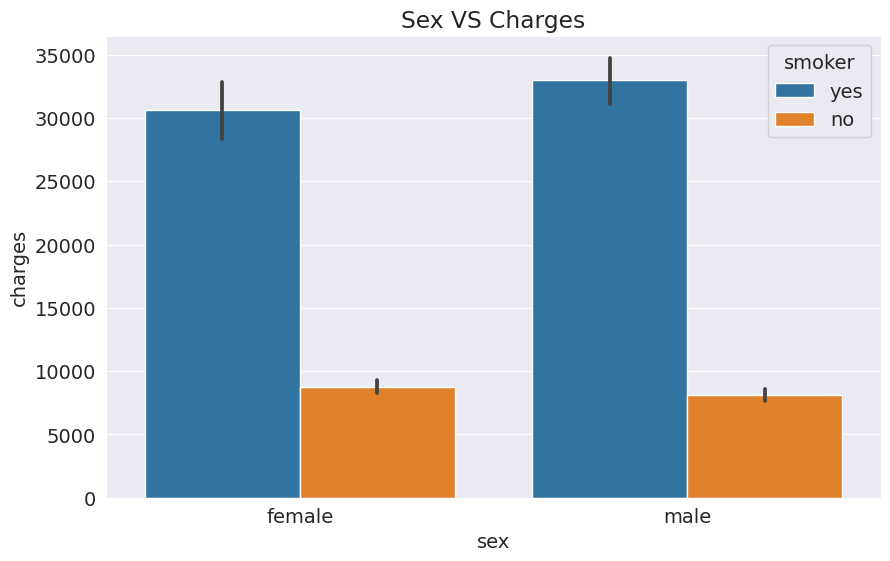

In [26]:
plt.title('Sex VS Charges');
sns.barplot(x='sex', 
            y='charges',
            hue='smoker', 
           data=medical_df);


# Region VS Charges

<Axes: title={'center': 'Region VS Charges'}, xlabel='region', ylabel='charges'>

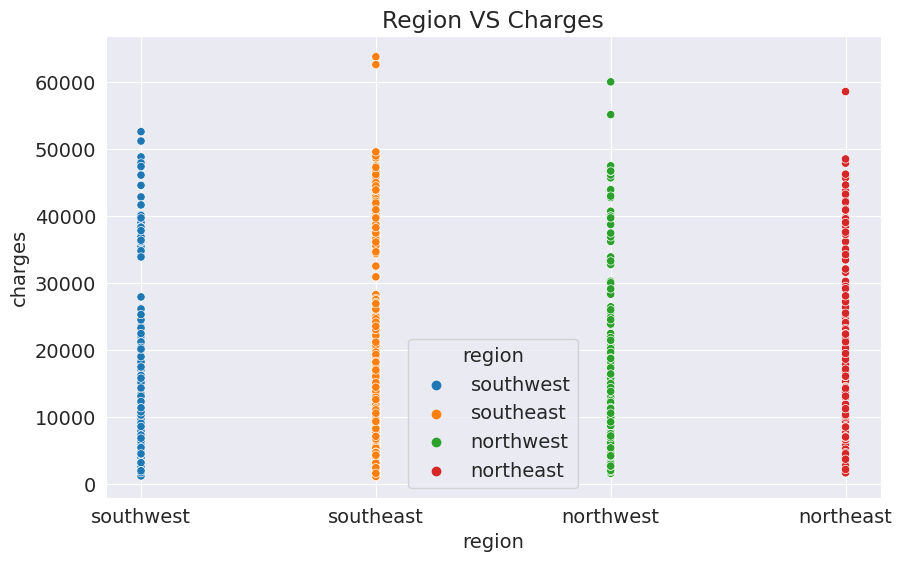

In [27]:
plt.title('Region VS Charges')
sns.scatterplot(x='region', 
                y='charges', 
                hue='region', 
                data=medical_df)


# **Correlation**
* **From the above analysis, we can observe that some variables do not grow(are not closely related) to the 'charges' variable. Eg: We can see that 'age' and 'charges' grow together while other columns like 'bmi' or 'sex' does not grow with charges.**
* This way of establishing relation can be done by calculating **correlation coeffecient**
* .corr method can be used from pandas library to establish relationships







In [28]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [29]:
medical_df.age.corr(medical_df.charges) #The statement above and here gives the same output

0.29900819333064754

In [30]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [31]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

# Note
**To make correlation between categorical columns with yes or no, they have to be converted to numeric columns through dictionary(key,value pair)**

In [32]:
smoker_values = {'no': 0, 'yes':1} #Store the catgorical values to respective numerical values in a dictionary
smoker_numeric= medical_df.smoker.map(smoker_values)  #Create a new variable where it is linked with the series smoker and maps the stored smoker values

medical_df.charges.corr(smoker_numeric) 

0.787251430498478

# Correlation Coeffecient Info

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

1. The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

2. A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

3. When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

* **Direction** : The sign of the correlation coefficient represents the direction of the relationship.

1. Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

2. Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.
